# 가스 공급량 수요예측 모델 개발 공모전

In [58]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta

# 1.데이터 불러오기

In [59]:
df = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\한국가스공사_시간별 공급량_20181231.csv', encoding = 'utf-8')

In [60]:
weather13 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2013.csv', encoding = 'utf-8')
weather14 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2014.csv', encoding = 'utf-8')
weather15 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2015.csv', encoding = 'utf-8')
weather16 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2016.csv', encoding = 'utf-8')
weather17 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2017.csv', encoding = 'utf-8')
weather18 = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\기상청 2018.csv', encoding = 'utf-8')

In [61]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [62]:
weather13

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,108,서울,2013-01-01 0:00,-8.3,NaN,3.6,56.0,1010.3,NaN,6.4,3.0,2000.0,NaN,NaN,-3.3
1,108,서울,2013-01-01 1:00,-8.5,NaN,4.0,57.0,1010.0,NaN,6.4,NaN,NaN,NaN,NaN,-3.4
2,108,서울,2013-01-01 2:00,-8.4,NaN,4.0,60.0,1009.4,NaN,6.4,NaN,NaN,NaN,NaN,-3.4
3,108,서울,2013-01-01 3:00,-8.1,NaN,3.4,58.0,1009.2,NaN,6.4,6.0,2000.0,13.0,NaN,-3.4
4,108,서울,2013-01-01 4:00,-8.2,NaN,3.8,58.0,1008.2,NaN,6.4,6.0,2000.0,NaN,NaN,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,108,서울,2013-12-31 19:00,5.5,NaN,3.6,62.0,998.7,NaN,NaN,NaN,NaN,NaN,40.0,0.1
8756,108,서울,2013-12-31 20:00,5.2,NaN,2.7,70.0,999.0,NaN,NaN,NaN,NaN,NaN,40.0,0.1
8757,108,서울,2013-12-31 21:00,4.9,NaN,3.9,64.0,999.6,NaN,NaN,6.0,600.0,1.0,40.0,0.1
8758,108,서울,2013-12-31 22:00,4.2,NaN,3.6,62.0,1000.4,NaN,NaN,NaN,NaN,NaN,40.0,0.1


# 2.데이터 확인하기

In [63]:
df.info()
print('-'*50)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB
--------------------------------------------------


연월일    0
시간     0
구분     0
공급량    0
dtype: int64

In [64]:
weather13.info()
print('-'*50)
weather13.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지점            8760 non-null   int64  
 1   지점명           8760 non-null   object 
 2   일시            8760 non-null   object 
 3   기온(°C)        8760 non-null   float64
 4   강수량(mm)       930 non-null    float64
 5   풍속(m/s)       8760 non-null   float64
 6   습도(%)         8760 non-null   float64
 7   현지기압(hPa)     8760 non-null   float64
 8   일조(hr)        4795 non-null   float64
 9   적설(cm)        1080 non-null   float64
 10  전운량(10분위)     6807 non-null   float64
 11  시정(10m)       6807 non-null   float64
 12  지면상태(지면상태코드)  1463 non-null   float64
 13  현상번호(국내식)     3394 non-null   float64
 14  지면온도(°C)      8757 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.0+ MB
--------------------------------------------------


지점                 0
지점명                0
일시                 0
기온(°C)             0
강수량(mm)         7830
풍속(m/s)            0
습도(%)              0
현지기압(hPa)          0
일조(hr)          3965
적설(cm)          7680
전운량(10분위)       1953
시정(10m)         1953
지면상태(지면상태코드)    7297
현상번호(국내식)       5366
지면온도(°C)           3
dtype: int64

In [65]:
weather13.info()
print('-'*50)
weather14.info()
print('-'*50)
weather15.info()
print('-'*50)
weather16.info()
print('-'*50)
weather17.info()
print('-'*50)
weather18.info()
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지점            8760 non-null   int64  
 1   지점명           8760 non-null   object 
 2   일시            8760 non-null   object 
 3   기온(°C)        8760 non-null   float64
 4   강수량(mm)       930 non-null    float64
 5   풍속(m/s)       8760 non-null   float64
 6   습도(%)         8760 non-null   float64
 7   현지기압(hPa)     8760 non-null   float64
 8   일조(hr)        4795 non-null   float64
 9   적설(cm)        1080 non-null   float64
 10  전운량(10분위)     6807 non-null   float64
 11  시정(10m)       6807 non-null   float64
 12  지면상태(지면상태코드)  1463 non-null   float64
 13  현상번호(국내식)     3394 non-null   float64
 14  지면온도(°C)      8757 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.0+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex

# 3.데이터 합치기

### 데이터 시간 이슈
기상청 데이터의 01:00시는 1시정각의 온도
가스의 시간 1은 00:00 ~ 01:00 가스 사용량 그래서 본인은 가스시간 1시의 데이터에는 기상청 날씨 00:00 시간의 기상청 데이터를 사용해야한다고 생각 그래서 데이터를 재수집 한다음 데이터를 다시 합침 기점 유의할것

In [66]:
#날씨 데이터 합치기

weather = pd.concat([weather13,weather14,weather15,weather16,weather17,weather18])
weather = weather.reset_index()

In [67]:
#필요없는 컬럼 삭제

weather = weather.drop(columns = ['index','지점','지점명'])

In [68]:
#결측치 0으로 대치
weather = weather.fillna(0)

In [69]:
#일시의 시간 표시 시간이라는 컬럼으로 빼기
from datetime import datetime


weather['일시'] = pd.to_datetime(weather['일시'])
weather['연월일'] = weather['일시'].dt.date
weather['시간'] = weather['일시'].dt.hour



In [70]:
weather

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),연월일,시간
0,2013-01-01 00:00:00,-8.3,0.0,3.6,56.0,1010.3,0.0,6.4,3.0,2000.0,0.0,0.0,-3.3,2013-01-01,0
1,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,0.0,0.0,-3.4,2013-01-01,1
2,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,0.0,0.0,-3.4,2013-01-01,2
3,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,2000.0,13.0,0.0,-3.4,2013-01-01,3
4,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,2000.0,0.0,0.0,-3.4,2013-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2018-12-31 19:00:00,-3.1,0.0,2.1,43.0,1025.5,0.0,0.0,0.0,1905.0,0.0,0.0,-2.2,2018-12-31,19
52580,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,1765.0,0.0,0.0,-3.0,2018-12-31,20
52581,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,1658.0,0.0,0.0,-4.1,2018-12-31,21
52582,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,1694.0,0.0,0.0,-5.0,2018-12-31,22


In [71]:
#일시의 시간 +1 시키기

weather['시간'] = weather['시간'].apply(lambda x: x  + 1)

In [72]:
weather

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),연월일,시간
0,2013-01-01 00:00:00,-8.3,0.0,3.6,56.0,1010.3,0.0,6.4,3.0,2000.0,0.0,0.0,-3.3,2013-01-01,1
1,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,0.0,0.0,-3.4,2013-01-01,2
2,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,0.0,0.0,-3.4,2013-01-01,3
3,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,2000.0,13.0,0.0,-3.4,2013-01-01,4
4,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,2000.0,0.0,0.0,-3.4,2013-01-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2018-12-31 19:00:00,-3.1,0.0,2.1,43.0,1025.5,0.0,0.0,0.0,1905.0,0.0,0.0,-2.2,2018-12-31,20
52580,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,1765.0,0.0,0.0,-3.0,2018-12-31,21
52581,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,1658.0,0.0,0.0,-4.1,2018-12-31,22
52582,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,1694.0,0.0,0.0,-5.0,2018-12-31,23


In [73]:
# #시간이 0 인거 24로 바꾸기
# for i in tqdm(range(len(weather))):
    
#     if weather['시간'][i] == 0:
#         weather['시간'][i] = 24
        
        
# weather['잡'] = 0

# #시간이 24인거 하루 전으로 만들기
# for i in tqdm(range(len(weather))):
#     if weather['시간'][i] == 24:
#         weather['잡'][i] = weather['일시'][i] +timedelta(days = -1)

# #하루전으로 되돌린 날짜 연월일에 넣기
# for x in tqdm(range(len(weather))):
#     if weather['잡'][x] != 0:
#         weather['연월일'][x] = str(weather['잡'][x])[:10]


# weather = weather.drop(columns = '잡')

In [74]:
#df데이타와 weather 데이터 합치기

df['연월일'] = df['연월일'].astype('str')
weather['연월일'] = weather['연월일'].astype('str')


df = pd.merge(df, weather, on = ['연월일','시간'], how = 'left')

In [75]:
#구분 기준으로 결측치 확인
for i in df['구분'].unique():
    a = df[df['구분'] == i]
    print('-'*25,i,'-'*25)
    print(a.isnull().sum())
    print('-'*50)

------------------------- A -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
습도(%)           0
현지기압(hPa)       0
일조(hr)          0
적설(cm)          0
전운량(10분위)       0
시정(10m)         0
지면상태(지면상태코드)    0
현상번호(국내식)       0
지면온도(°C)        0
dtype: int64
--------------------------------------------------
------------------------- B -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
습도(%)           0
현지기압(hPa)       0
일조(hr)          0
적설(cm)          0
전운량(10분위)       0
시정(10m)         0
지면상태(지면상태코드)    0
현상번호(국내식)       0
지면온도(°C)        0
dtype: int64
--------------------------------------------------
------------------------- C -------------------------
연월일             0
시간              0
구분              0
공급량             0
일시              0
기온(°C)  

In [76]:
df

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,2013-01-01,1,A,2497.129,2013-01-01 00:00:00,-8.3,0.0,3.6,56.0,1010.3,0.0,6.4,3.0,2000.0,0.0,0.0,-3.3
1,2013-01-01,2,A,2363.265,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,0.0,0.0,-3.4
2,2013-01-01,3,A,2258.505,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,0.0,0.0,-3.4
3,2013-01-01,4,A,2243.969,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,2000.0,13.0,0.0,-3.4
4,2013-01-01,5,A,2344.105,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,2000.0,0.0,0.0,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,2018-12-31 19:00:00,-3.1,0.0,2.1,43.0,1025.5,0.0,0.0,0.0,1905.0,0.0,0.0,-2.2
368084,2018-12-31,21,H,669.961,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,1765.0,0.0,0.0,-3.0
368085,2018-12-31,22,H,657.941,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,1658.0,0.0,0.0,-4.1
368086,2018-12-31,23,H,610.953,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,1694.0,0.0,0.0,-5.0


# 4.그래프와 변수 확인하기

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\marketing\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\marketing\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


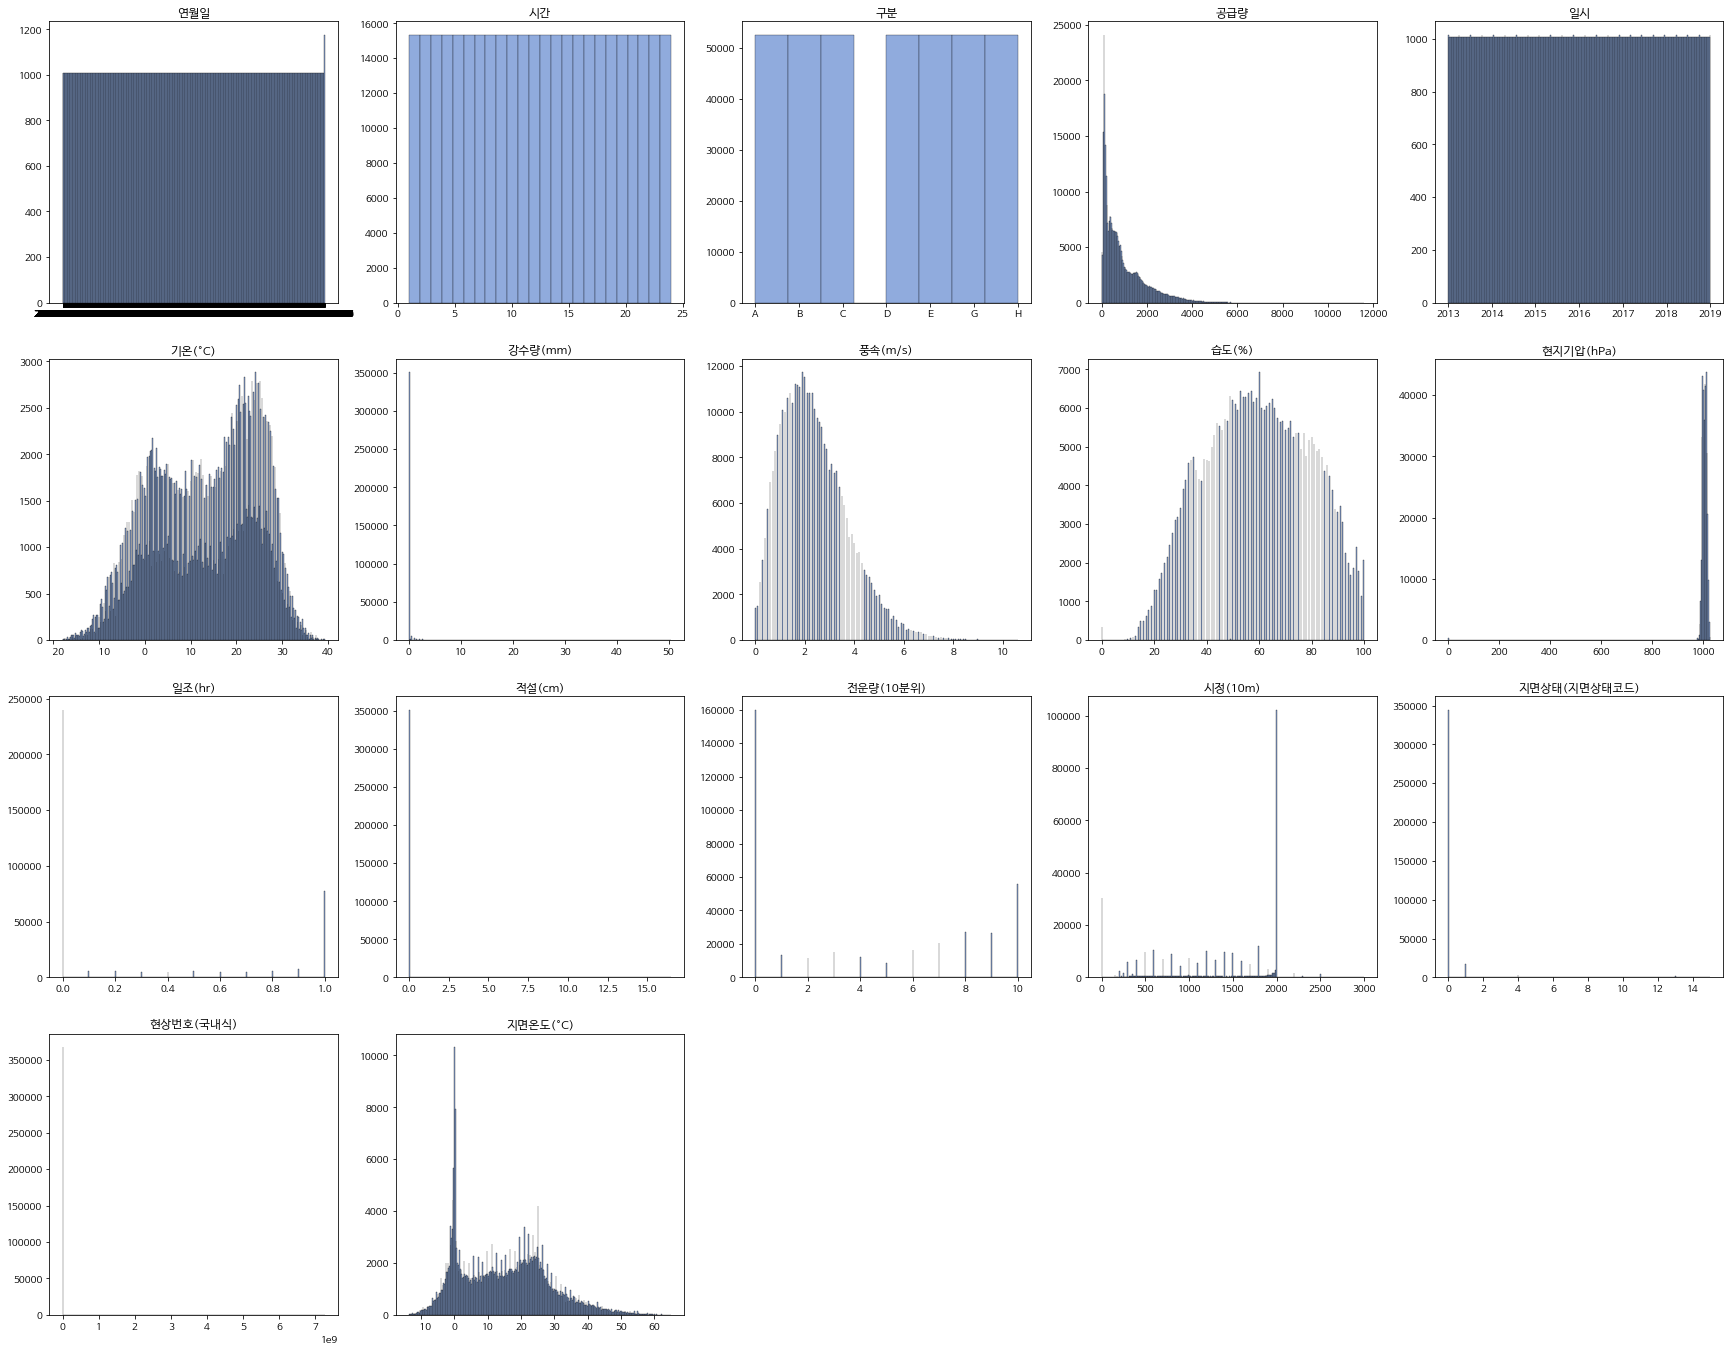

In [79]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수 
bin = [365,24,8,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365] 

for index, value in enumerate(df):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(df[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

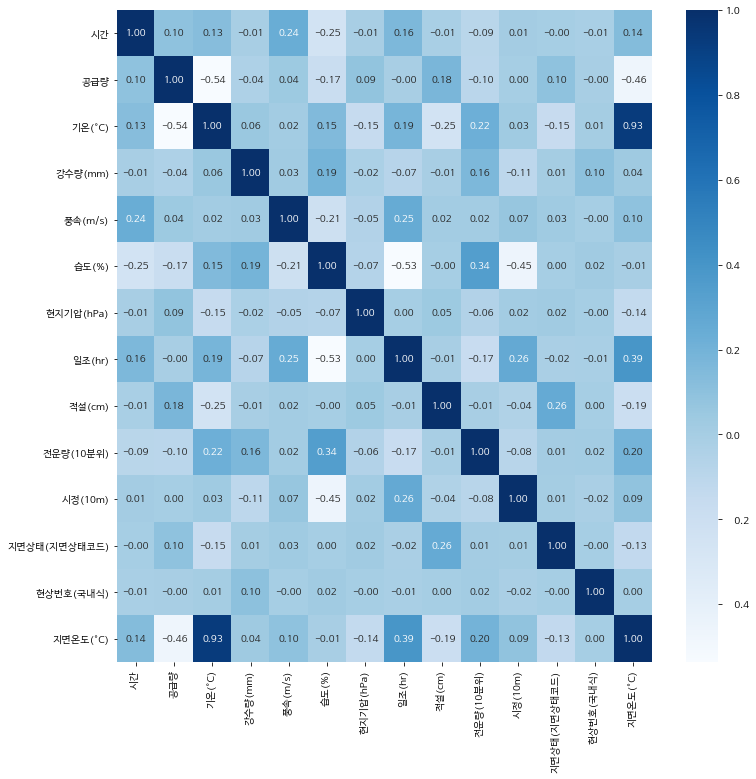

In [80]:
#상관계수 히트맵 그려보기

plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', cmap='Blues')

In [81]:
#문자열 변수인 '연월일',구분' 숫자형으로 변경
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['연월일'] = label_encoder.fit_transform(df['연월일'])

In [82]:
a

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
52560,2013-01-01,1,H,562.964,2013-01-01 00:00:00,-8.3,0.0,3.6,56.0,1010.3,0.0,6.4,3.0,2000.0,0.0,0.0,-3.3
52561,2013-01-01,2,H,531.228,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,0.0,0.0,-3.4
52562,2013-01-01,3,H,496.276,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,0.0,0.0,-3.4
52563,2013-01-01,4,H,489.396,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,2000.0,13.0,0.0,-3.4
52564,2013-01-01,5,H,535.420,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,2000.0,0.0,0.0,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,2018-12-31 19:00:00,-3.1,0.0,2.1,43.0,1025.5,0.0,0.0,0.0,1905.0,0.0,0.0,-2.2
368084,2018-12-31,21,H,669.961,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,1765.0,0.0,0.0,-3.0
368085,2018-12-31,22,H,657.941,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,1658.0,0.0,0.0,-4.1
368086,2018-12-31,23,H,610.953,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,1694.0,0.0,0.0,-5.0


In [83]:
#기본 회귀식 돌리기
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

a = df[df['구분'] == 'A']

X = a.drop(['일시','공급량','구분'], axis = 1)
y = a['공급량']

sm_model = sm.OLS(y,X)
sm_model_fit = sm_model.fit()

In [84]:
sm_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    공급량   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          6.331e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        11:17:52   Log-Likelihood:                     -3.7900e+05
No. Observations:               52584   AIC:                                  7.580e+05
Df Residuals:                   52570   BIC:                                  7.582e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
연월일             -0.0047      0.003     -1.850      0.064      -0.010       0.000
시간              26.7847      0.224    119.841      0.000      26.347      27.223
기온(°C)         -71.9345      0.421   -170.996      0.000     -72.759     -71.110
강수량(mm)         -5.4695      1.351     -4.050      0.000      -8.117      -2.822
풍속(m/s)         -6.0544      1.171     -5.171      0.000      -8.349      -3.760
습도(%)           -0.7965      0.103     -7.731      0.000      -0.998      -0.595
현지기압(hPa)        1.5191      0.009    166.767      0.000       1.501       1.537
일조(hr)         182.6259      4.891     37.337      0.000     173.039     192.213
적설(cm)          47.4526      1.407     33.721      0.000      44.694      50.211
전운량(10분위)       19.4897      0.390     49.999      0.000      18.726      20.254
시정(10m)         -0.0118      0.002     -4.907      0.000      -0.017      -0.007
지면상태(지면상태코드)     5.0512      1.366      3.699      0.000       2.375       7.728
현상번호(국내식)     1.885e-08   1.51e-08      1.248      0.212   -1.07e-08    4.84e-08
지면온도(°C)        13.4363      0.369     36.390      0.000      12.713      14.160
==============================================================================
Omnibus:                    19671.283   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           656592.085
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                      20.156   Cond. No.                     3.26e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결과해석
1.결정계수 값은 0.671로 변수들이 이 회귀식을 0.671정도 설명하고 있다 즉 나쁘지 않다

2.대부분의 변수들이 p-value 값이 0.05보다 이하지만 현상번호는 0.752로 0.05보다 높다 그래서 변수를 제거를 할것이다

3.Notes.3번에서 알 수 있듯 다중공선성문제가 존재한다고 한다



### 구분을 A로 하고 회귀식
-모델 결정계수가 상당히 좋아졌다. -> 모델을 돌릴때 구분을 기준으로 따로 돌릴것이다


In [85]:
#다중공선성 확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
6,41.356590,현지기압(hPa)
13,26.867348,지면온도(°C)
2,26.277618,기온(°C)
5,20.569234,습도(%)
10,6.125481,시정(10m)
4,5.095239,풍속(m/s)
0,5.033816,연월일
1,5.027236,시간
7,3.031077,일조(hr)
9,2.378255,전운량(10분위)


In [86]:
# plt.figure(figsize= (16,9))
# sns.lineplot(x = df['일시'], y = df['공급량'])


#너무 오래걸림 and 확인해보니 항상 연초~연말에 공급량이 높음 즉 겨울에 공급량이 높은데 이것으로 기온에지대한 영향이 있을것으로 추측

# 5.test데이터셋 전처리

In [87]:
test = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\test.csv', encoding = 'utf-8')

In [88]:
#데이터 라벨변환한거 다시 되돌리기
df['연월일'] = label_encoder.inverse_transform(df['연월일'])


### -test데이터 셋에 기상청 데이터 채워 넣기
***중요한것
우리는 train 데이터 셋으로 test 데이터 셋을 채워 넣어야한다.***

1.평균으로 넣든

2.추세를 보고 값을 채워 넣든

우리는 input 값을 채워 넣어야 우리는 분석을 진행을 할 수가 있다

In [89]:
test

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A
...,...
15115,2019-03-31 20 H
15116,2019-03-31 21 H
15117,2019-03-31 22 H
15118,2019-03-31 23 H


In [90]:
#연월일,시간,구분 만들기
test['연월일'] = 0
test['시간'] = 0
test['구분'] = 0
test['월일'] = 0
for i in tqdm(range(len(test))):
    test['연월일'][i] = test['일자|시간|구분'][i][:10]
    test['시간'][i] = test['일자|시간|구분'][i][11:13]
    test['구분'][i] = test['일자|시간|구분'][i][-1:]
    
for i in tqdm(range(len(test))):
    test['월일'][i] = test['연월일'][i][5:10]
test = test.drop(columns = '일자|시간|구분')

  0%|                                                                                        | 0/15120 [00:00<?, ?it/s]<ipython-input-90-2871ff4ede7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['연월일'][i] = test['일자|시간|구분'][i][:10]
C:\Users\marketing\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-90-2871ff4ede7a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [91]:
#df 월일만 추출
df['월일'] = df['연월일'].apply(lambda x: x[5:10])

In [92]:
#월일,시간 별로 각 변수 평균 구하기
df_mdt = df.groupby(['월일','시간']).mean()
df_mdt = df_mdt.reset_index()

In [93]:
#test 데이터셋 추가시키기
test = pd.merge(test, df_mdt, on = ['월일','시간'], how = 'left')

In [94]:
test

,연월일,시간,구분,월일,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,2019-01-01,1,A,01-01,1561.196524,-1.650000,0.000000,2.716667,54.166667,844.750000,0.000000,1.066667,2.666667,824.833333,0.000000,16.500000,-1.200000
1,2019-01-01,2,A,01-01,1459.118548,-3.116667,0.000000,2.450000,59.666667,1013.333333,0.000000,1.066667,0.000000,524.833333,0.000000,16.500000,-2.083333
2,2019-01-01,3,A,01-01,1363.019048,-3.483333,0.000000,2.233333,61.833333,1013.233333,0.000000,1.066667,0.000000,497.166667,0.000000,679.666667,-2.433333
3,2019-01-01,4,A,01-01,1352.706214,-3.716667,0.000000,2.233333,62.166667,1013.333333,0.000000,1.066667,1.000000,1239.333333,4.166667,713.000000,-2.650000
4,2019-01-01,5,A,01-01,1428.945429,-4.050000,0.000000,2.683333,63.333333,1013.183333,0.000000,1.066667,1.000000,1237.333333,0.000000,13.333333,-2.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2019-03-31,20,H,03-31,1121.900405,12.883333,0.000000,3.350000,47.666667,1006.383333,0.033333,0.000000,0.000000,1008.500000,0.000000,3.166667,11.166667
15116,2019-03-31,21,H,03-31,1123.256238,11.800000,0.000000,3.183333,50.000000,1006.866667,0.000000,0.000000,0.000000,998.166667,0.000000,3.166667,9.716667
15117,2019-03-31,22,H,03-31,1097.687143,11.083333,0.033333,2.666667,52.500000,1007.383333,0.000000,0.000000,2.666667,1500.333333,0.333333,317.000000,8.733333
15118,2019-03-31,23,H,03-31,1013.398238,10.450000,0.000000,2.000000,55.500000,1007.683333,0.000000,0.000000,1.666667,956.000000,0.000000,31700.166667,7.750000


# 6.데이터 전처리

### 전처리 이슈
1.지면과 기온의 상관관계가 너무 높아 둘의 정보를 담고 있는 새로운 파생변수를 만들던가 혹은 둘중 하나의 변수를 삭제해야함
->지면온도 삭제 결정

2.구분컬럼에 가중치를 많이 줘서 모델을 돌릴것이다

In [95]:
#p-value가 0.05를 넘는 변수 삭제,필요없는 변수 삭제, 상관성이 높은 변수 삭제,
df = df.drop(columns = ['지면상태(지면상태코드)','현상번호(국내식)','지면온도(°C)'])
test = test.drop(columns = ['지면상태(지면상태코드)','현상번호(국내식)','지면온도(°C)'])


In [96]:
#다중공선성 제거와 표준화를 위한 정규화
from sklearn.preprocessing import MinMaxScaler

fl_list = df.dtypes[df.dtypes == 'float64'].index.tolist()
fl_list.remove('공급량')
scaler = MinMaxScaler()



for i in tqdm(fl_list):
    df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))
    test[i] = scaler.fit_transform(test[i].values.reshape(-1,1))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 243.86it/s]


In [100]:
df

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),월일
0,2013-01-01,1,A,2497.129,2013-01-01 00:00:00,0.168990,0.0,0.339623,0.56,0.982495,0.0,0.387879,0.3,0.666667,01-01
1,2013-01-01,2,A,2363.265,2013-01-01 01:00:00,0.165505,0.0,0.377358,0.57,0.982204,0.0,0.387879,0.0,0.000000,01-01
2,2013-01-01,3,A,2258.505,2013-01-01 02:00:00,0.167247,0.0,0.377358,0.60,0.981620,0.0,0.387879,0.0,0.000000,01-01
3,2013-01-01,4,A,2243.969,2013-01-01 03:00:00,0.172474,0.0,0.320755,0.58,0.981426,0.0,0.387879,0.6,0.666667,01-01
4,2013-01-01,5,A,2344.105,2013-01-01 04:00:00,0.170732,0.0,0.358491,0.58,0.980453,0.0,0.387879,0.6,0.666667,01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,2018-12-31 19:00:00,0.259582,0.0,0.198113,0.43,0.997277,0.0,0.000000,0.0,0.635000,12-31
368084,2018-12-31,21,H,669.961,2018-12-31 20:00:00,0.249129,0.0,0.075472,0.39,0.996694,0.0,0.000000,0.5,0.588333,12-31
368085,2018-12-31,22,H,657.941,2018-12-31 21:00:00,0.233449,0.0,0.103774,0.44,0.996596,0.0,0.000000,0.0,0.552667,12-31
368086,2018-12-31,23,H,610.953,2018-12-31 22:00:00,0.219512,0.0,0.122642,0.46,0.996207,0.0,0.000000,0.0,0.564667,12-31


In [97]:
test

,연월일,시간,구분,월일,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m)
0,2019-01-01,1,A,01-01,1561.196524,0.241083,0.000000,0.433692,0.542056,0.022869,0.000000,0.349727,0.266667,0.325954
1,2019-01-01,2,A,01-01,1459.118548,0.182959,0.000000,0.376344,0.644860,0.967049,0.000000,0.349727,0.000000,0.148053
2,2019-01-01,3,A,01-01,1363.019048,0.168428,0.000000,0.329749,0.685358,0.966489,0.000000,0.349727,0.000000,0.131647
3,2019-01-01,4,A,01-01,1352.706214,0.159181,0.000000,0.329749,0.691589,0.967049,0.000000,0.349727,0.100000,0.571753
4,2019-01-01,5,A,01-01,1428.945429,0.145971,0.000000,0.426523,0.713396,0.966209,0.000000,0.349727,0.100000,0.570567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2019-03-31,20,H,03-31,1121.900405,0.817041,0.000000,0.569892,0.420561,0.928125,0.033333,0.000000,0.000000,0.434869
15116,2019-03-31,21,H,03-31,1123.256238,0.774108,0.000000,0.534050,0.464174,0.930832,0.000000,0.000000,0.000000,0.428741
15117,2019-03-31,22,H,03-31,1097.687143,0.745707,0.011765,0.422939,0.510903,0.933725,0.000000,0.000000,0.266667,0.726527
15118,2019-03-31,23,H,03-31,1013.398238,0.720608,0.000000,0.279570,0.566978,0.935406,0.000000,0.000000,0.166667,0.403736


In [101]:
#LabelEncoder를 이용한 문자형 숫자형으로 변환
numerical_feats = df.dtypes[df.dtypes == "object"].index.tolist()#문자형 변수만 뽑기

for i in list(df.columns):
    df[i] = df[i].astype('str')
    
df['구분'] = label_encoder.fit_transform(df['구분'])
df['연월일'] = label_encoder.fit_transform(df['연월일'])
df['월일'] = label_encoder.fit_transform(df['월일'])

In [102]:
numerical_feats = test.dtypes[test.dtypes == "object"].index.tolist()

for i in list(test.columns):
    test[i] = test[i].astype('str')
    
test['구분'] = label_encoder.fit_transform(test['구분'])
test['연월일'] = label_encoder.fit_transform(test['연월일'])
test['월일'] = label_encoder.fit_transform(test['월일'])

In [103]:
#월일 컬럼 필요없으니 제거
df = df.drop(columns = '일시')

In [104]:
df

,연월일,시간,구분,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),월일
0,0,1,0,2497.129,0.1689895470383275,0.0,0.339622641509434,0.56,0.9824953807254692,0.0,0.38787878787878793,0.30000000000000004,0.6666666666666666,0
1,0,2,0,2363.265,0.1655052264808362,0.0,0.37735849056603776,0.5700000000000001,0.9822036370708938,0.0,0.38787878787878793,0.0,0.0,0
2,0,3,0,2258.505,0.16724738675958187,0.0,0.37735849056603776,0.6,0.9816201497617427,0.0,0.38787878787878793,0.0,0.0,0
3,0,4,0,2243.969,0.17247386759581881,0.0,0.3207547169811321,0.58,0.9814256539920257,0.0,0.38787878787878793,0.6000000000000001,0.6666666666666666,0
4,0,5,0,2344.105,0.17073170731707316,0.0,0.3584905660377359,0.58,0.9804531751434407,0.0,0.38787878787878793,0.6000000000000001,0.6666666666666666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2190,20,6,681.033,0.259581881533101,0.0,0.19811320754716982,0.43,0.9972770592239619,0.0,0.0,0.0,0.635,365
368084,2190,21,6,669.961,0.24912891986062716,0.0,0.07547169811320756,0.39,0.996693571914811,0.0,0.0,0.5,0.5883333333333333,365
368085,2190,22,6,657.941,0.23344947735191635,0.0,0.1037735849056604,0.44,0.9965963240299524,0.0,0.0,0.0,0.5526666666666666,365
368086,2190,23,6,610.953,0.2195121951219512,0.0,0.12264150943396228,0.46,0.9962073324905184,0.0,0.0,0.0,0.5646666666666667,365


In [105]:
test = test.drop(columns = '공급량')
test

,연월일,시간,구분,월일,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m)
0,0,1,0,0,0.2410832232496699,0.0,0.4336917562724014,0.542056074766355,0.02286941099598394,0.0,0.3497267759562842,0.26666666666666666,0.32595374579956515
1,0,2,0,0,0.1829590488771468,0.0,0.3763440860215057,0.6448598130841121,0.9670493792588459,0.0,0.3497267759562842,0.0,0.14805297489622454
2,0,3,0,0,0.16842800528401602,0.0,0.32974910394265317,0.6853582554517135,0.9664893120507791,0.0,0.3497267759562842,0.0,0.13164657046847206
3,0,4,0,0,0.1591809775429327,0.0,0.3297491039426522,0.6915887850467288,0.9670493792588468,0.0,0.3497267759562842,0.1,0.571753310931014
4,0,5,0,0,0.1459709379128139,0.0,0.42652329749103945,0.7133956386292835,0.9662092784467466,0.0,0.3497267759562842,0.1,0.5705673057916584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,89,20,6,89,0.8170409511228536,0.0,0.5698924731182798,0.4205607476635513,0.9281247082983324,0.03333333333333333,0.0,0.0,0.4348685510970547
15116,89,21,6,89,0.7741083223249674,0.0,0.5340501792114698,0.4641744548286603,0.9308316998039778,0.0,0.0,0.0,0.42874085787705074
15117,89,22,6,89,0.7457067371202117,0.01176470588235294,0.42293906810035875,0.5109034267912771,0.9337253803789807,0.0,0.0,0.26666666666666666,0.7265269816169203
15118,89,23,6,89,0.720607661822986,0.0,0.2795698924731184,0.5669781931464175,0.9354055820031766,0.0,0.0,0.16666666666666669,0.4037359161889701


# 모델적용

In [106]:
#문자형인 컬럼들 숫자형으로 변환
for i in df.columns:
    df[i] = df[i].astype('float')

for i in test.columns:
    test[i] = test[i].astype('float')

In [107]:
#X_train,y_train 나누기
X = df.drop(columns = '공급량')
y = df['공급량']

In [108]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [109]:
X.shape, y.shape, test.shape

((368088, 13), (368088,), (15120, 13))

In [110]:
#데이터 슬라이싱 상황 보기
sfk = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 55)

for n_fold,(tr_idx, val_idx) in enumerate(sfk.split(X,X['구분'])):
    print(n_fold,(tr_idx, val_idx))

0 (array([     0,      1,      2, ..., 368085, 368086, 368087]), array([     5,     11,     15, ..., 368055, 368059, 368064]))
1 (array([     1,      2,      3, ..., 368085, 368086, 368087]), array([     0,      6,     10, ..., 368068, 368077, 368084]))
2 (array([     0,      1,      2, ..., 368084, 368085, 368087]), array([     7,      9,     18, ..., 368053, 368058, 368086]))
3 (array([     0,      2,      3, ..., 368085, 368086, 368087]), array([     1,      8,     12, ..., 368071, 368072, 368074]))
4 (array([     0,      1,      4, ..., 368085, 368086, 368087]), array([     2,      3,     28, ..., 368076, 368078, 368081]))
5 (array([     0,      1,      2, ..., 368084, 368085, 368086]), array([    47,     48,     78, ..., 368043, 368082, 368087]))
6 (array([     0,      1,      2, ..., 368084, 368086, 368087]), array([    17,     39,     41, ..., 368067, 368083, 368085]))
7 (array([     0,      1,      2, ..., 368085, 368086, 368087]), array([   102,    106,    107, ..., 368037, 36

# 위 내용 설명
위의 작업은 교차검증을 하기 위한 예시 코드 이다
기본적으로 모델을 돌릴때 우리는 train_x 와 test_x를 나누어서 검증이란 단계를 거친다 이게 흔히 우리가 아는 train과 test 셋을 나누는 이유이다

검증이란 단계를 거쳐야 우리가 만든 모델의 정확도를 알 수가 있고 모델을 더욱 고도화 할 수가 있다

그래서 위의 작업은 간단하게 말하면 df 셋을 train 셋과 test 세으로 나눈 작업이라고 할 수 있다.
 
데이터 슬라이싱에는 대표적으로 4가지 방법이 있는데 https://continuous-development.tistory.com/166 사이트에서 자세하게 설명을 해준다

우리가 사용할 교차검증 방법은 StratifiedKFold 방식으로 일반적인 방식과 다르게 슬라이싱 방법을 어떠한 기준을 중심으로 그 기준이 쏠리지 않게 데이터를 분할을 해준다

즉 나는 df['구분']컬럼을 기준으로 구분컬럼이 일정하게 섞이게 데이터를 슬라이싱을 했다

그리고 위의 결과를 보면 총 10개의 슬라이싱된 데이터들이 보이는데 위의 결과처럼 10개의 데이터 셋을 전부 차례대로 모델에 입력을 시켜 모델을 학습을 시킨다

In [111]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

n_splits = 10# 면번 데이터를 슬라이싱 할것인가 10번 할것이다

sfk = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 55)
#StratifiedKFold(기준을 두고 그 기준이 일정하게 뽑기)를 사용하여 랜덤하게 잘린 데이터를 10개 만들거다

y_pred = np.zeros(len(test))#모델 결과값들을 저장하는 리스트

# train데이터셋에서 구분의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(X, X['구분']):#우리는 X를 X['구분'] 컬럼의 내용의 비율이 동일하게 자르고 그것을 반복해서 넣을것이다   
    X_train = X.iloc[tr_idx, :]#tr_idx에 뽑힌 인덱스 번호에 해당하는 X는  X_train에 넣을것이다
    y_train = y[tr_idx]#위와 동일하게 tr_idx에 뽑힌 인덱스 번호에 해당하는 Y를 y_train에 넣을 것이다

    X_val = X.iloc[val_idx, :]#이 X_val은 검증용 즉 test의 X 용으로 사용하는 데이터 모음
    y_val = y[val_idx]#위와 동일 하고 y용으로 사용
    
    #모델 준비 lgbm모델의 하이퍼 파라미터를 설정 각 하이퍼 파라미터들은 검색하면 나옴
    lgbm = LGBMRegressor(n_estimators = 10000, learning_rate= 0.05,objective = 'mse',max_depth = 9)
    
    #학습
    lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'mse', early_stopping_rounds= 100,verbose = 100,random_state = 55)
    #학습하고 나온 모델을 test(우리가 결과를 내야하는 데이터)를 넣어서 predict을 사용해 결과를 도출 총 10번 뽑아서 값들을 다했으니
    #n_splits만큼 값을 나누어 준다 즉 10을 나누어 준다
    y_pred += lgbm.predict(test) / n_splits

C:\Users\marketing\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\marketing\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l1: 106.323
[200]	valid_0's l1: 87.1881
[300]	valid_0's l1: 80.0288
[400]	valid_0's l1: 75.8937
[500]	valid_0's l1: 73.2651
[600]	valid_0's l1: 71.0175
[700]	valid_0's l1: 69.2986
[800]	valid_0's l1: 67.8586
[900]	valid_0's l1: 66.6508
[1000]	valid_0's l1: 65.3451
[1100]	valid_0's l1: 64.2221
[1200]	valid_0's l1: 63.5417
[1300]	valid_0's l1: 62.8762
[1400]	valid_0's l1: 62.2226
[1500]	valid_0's l1: 61.56
[1600]	valid_0's l1: 60.9593
[1700]	valid_0's l1: 60.2376
[1800]	valid_0's l1: 59.7097
[1900]	valid_0's l1: 59.1978
[2000]	valid_0's l1: 58.6562
[2100]	valid_0's l1: 58.1621
[2200]	valid_0's l1: 57.7721
[2300]	valid_0's l1: 57.3181
[2400]	valid_0's l1: 56.88
[2500]	valid_0's l1: 56.5257
[2600]	valid_0's l1: 56.1269
[2700]	valid_0's l1: 55.8568
[2800]	valid_0's l1: 55.5146
[2900]	valid_0's l1: 55.2416
[3000]	valid_0's l1: 54.9268
[3100]	valid_0's l1: 54.5983
[3200]	valid_0's l1: 54.3385
[3300]	valid_0's l1: 54.0495
[3400]	valid_0's l1: 53.804
[3500]	valid_0's l1: 53.513


[8600]	valid_0's l1: 47.2559
[8700]	valid_0's l1: 47.1834
[8800]	valid_0's l1: 47.1573
[8900]	valid_0's l1: 47.1343
[9000]	valid_0's l1: 47.0794
[9100]	valid_0's l1: 47.0531
[9200]	valid_0's l1: 47.0291
[9300]	valid_0's l1: 46.9676
[9400]	valid_0's l1: 46.8811
[9500]	valid_0's l1: 46.8079
[9600]	valid_0's l1: 46.7515
[9700]	valid_0's l1: 46.7094
[9800]	valid_0's l1: 46.638
[9900]	valid_0's l1: 46.5284
[10000]	valid_0's l1: 46.4612
[100]	valid_0's l1: 104.941
[200]	valid_0's l1: 86.737
[300]	valid_0's l1: 79.985
[400]	valid_0's l1: 76.1245
[500]	valid_0's l1: 73.2182
[600]	valid_0's l1: 71.0842
[700]	valid_0's l1: 69.3268
[800]	valid_0's l1: 67.9433
[900]	valid_0's l1: 66.6591
[1000]	valid_0's l1: 65.7185
[1100]	valid_0's l1: 64.8688
[1200]	valid_0's l1: 64.0033
[1300]	valid_0's l1: 63.203
[1400]	valid_0's l1: 62.4965
[1500]	valid_0's l1: 61.8632
[1600]	valid_0's l1: 61.1954
[1700]	valid_0's l1: 60.6568
[1800]	valid_0's l1: 60.1486
[1900]	valid_0's l1: 59.6437
[2000]	valid_0's l1: 59.10

[7100]	valid_0's l1: 48.0034
[7200]	valid_0's l1: 47.895
[7300]	valid_0's l1: 47.7832
[7400]	valid_0's l1: 47.6722
[7500]	valid_0's l1: 47.6327
[7600]	valid_0's l1: 47.5767
[7700]	valid_0's l1: 47.4888
[7800]	valid_0's l1: 47.4231
[7900]	valid_0's l1: 47.3565
[8000]	valid_0's l1: 47.2933
[8100]	valid_0's l1: 47.231
[8200]	valid_0's l1: 47.1858
[8300]	valid_0's l1: 47.152
[8400]	valid_0's l1: 47.0586
[8500]	valid_0's l1: 46.9977
[8600]	valid_0's l1: 46.9577
[8700]	valid_0's l1: 46.9167
[8800]	valid_0's l1: 46.8363
[8900]	valid_0's l1: 46.7974
[9000]	valid_0's l1: 46.7225
[9100]	valid_0's l1: 46.6699
[9200]	valid_0's l1: 46.6444
[9300]	valid_0's l1: 46.6168
[9400]	valid_0's l1: 46.5311
[9500]	valid_0's l1: 46.4665
[9600]	valid_0's l1: 46.4055
[9700]	valid_0's l1: 46.373
[9800]	valid_0's l1: 46.3348
[9900]	valid_0's l1: 46.3178
[10000]	valid_0's l1: 46.287
[100]	valid_0's l1: 105.071
[200]	valid_0's l1: 86.4562
[300]	valid_0's l1: 79.7312
[400]	valid_0's l1: 75.7369
[500]	valid_0's l1: 73

[5600]	valid_0's l1: 49.6094
[5700]	valid_0's l1: 49.4971
[5800]	valid_0's l1: 49.3736
[5900]	valid_0's l1: 49.2456
[6000]	valid_0's l1: 49.1389
[6100]	valid_0's l1: 49.0506
[6200]	valid_0's l1: 48.9464
[6300]	valid_0's l1: 48.8438
[6400]	valid_0's l1: 48.7287
[6500]	valid_0's l1: 48.5483
[6600]	valid_0's l1: 48.3888
[6700]	valid_0's l1: 48.257
[6800]	valid_0's l1: 48.1237
[6900]	valid_0's l1: 48.0061
[7000]	valid_0's l1: 47.8974
[7100]	valid_0's l1: 47.7835
[7200]	valid_0's l1: 47.7107
[7300]	valid_0's l1: 47.6259
[7400]	valid_0's l1: 47.5323
[7500]	valid_0's l1: 47.4594
[7600]	valid_0's l1: 47.3575
[7700]	valid_0's l1: 47.2512
[7800]	valid_0's l1: 47.1087
[7900]	valid_0's l1: 47.0275
[8000]	valid_0's l1: 46.9532
[8100]	valid_0's l1: 46.9171
[8200]	valid_0's l1: 46.8815
[8300]	valid_0's l1: 46.83
[8400]	valid_0's l1: 46.7565
[8500]	valid_0's l1: 46.6733
[8600]	valid_0's l1: 46.6549
[8700]	valid_0's l1: 46.6285
[8800]	valid_0's l1: 46.5535
[8900]	valid_0's l1: 46.5008
[9000]	valid_0's 

In [112]:
#답안지 불러오기
sample_submission = pd.read_csv('C:\\Users\\marketing\\김동우파이썬\\데이터 모음\\가스공급량\\sample_submission.csv')
sample_submission

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0
...,...,...
15115,2019-03-31 20 H,0
15116,2019-03-31 21 H,0
15117,2019-03-31 22 H,0
15118,2019-03-31 23 H,0


In [113]:
#우리 결과값들 답안지에 작성
submission = sample_submission.copy()
submission['공급량'] = y_pred

In [114]:
submission

,일자|시간|구분,공급량
0,2019-01-01 01 A,2711.265202
1,2019-01-01 02 A,2431.827232
2,2019-01-01 03 A,2293.466320
3,2019-01-01 04 A,2325.431870
4,2019-01-01 05 A,2502.780134
...,...,...
15115,2019-03-31 20 H,299.003250
15116,2019-03-31 21 H,301.274625
15117,2019-03-31 22 H,311.738825
15118,2019-03-31 23 H,288.385345


In [115]:
#답안지 csv 파일로 저장 csv 파일은 본 파이썬 파일이 있는 위치에 있음
submission.to_csv('3st_test_submission.csv', index= False)

# Optuna 사용해보기
아직 optuna를 5번 밖에 돌리지 않아서 최적의 파라미터라곤 장담 못함 최소 100번은 주말을 이용을 해서 돌릴생각임

In [112]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

In [113]:
def objectiveLGBM(trial: Trial,X, y, X_test):
    param = {
        "n_estimators" : trial.suggest_int("n_estimators",100,100000),
        "max_depth" : trial.suggest_int("max_depth",5,50),
        "min_data_in_leaf" : trial.suggest_int("min_data_in_leaf",30,100),
        "num_leaves" : trial.suggest_int("num_leaves",100,1000),
        "learning_rate" : 0.5,
        "random_state" : 42,
        "objective" : trial.suggest_categorical("objective",["mae","rmse","mse"])
    }
    
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
    
    
    model = LGBMRegressor(**param)
    lgbm = model.fit(X_train, y_train, verbose = 100,eval_set = [(X_val,y_val)],early_stopping_rounds= 100)
    
    score = mean_absolute_error(model.predict(X_val), y_val)
    
    return score

In [114]:
study = optuna.create_study(direction = 'minimize')

[I 2021-11-18 18:11:22,295] A new study created in memory with name: no-name-bff92de6-39ad-4701-b3b3-41f7a017f60f


In [115]:
study.optimize(lambda trial : objectiveLGBM(trial, X,  y, test), n_trials=5)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 16848.2
[200]	valid_0's l2: 14525.2
[300]	valid_0's l2: 13408.4
[400]	valid_0's l2: 12654.5
[500]	valid_0's l2: 12230.6
[600]	valid_0's l2: 11778.6
[700]	valid_0's l2: 11448.5
[800]	valid_0's l2: 11199
[900]	valid_0's l2: 11026.3
[1000]	valid_0's l2: 10793.7
[1100]	valid_0's l2: 10658.4
[1200]	valid_0's l2: 10512.3
[1300]	valid_0's l2: 10417.6
[1400]	valid_0's l2: 10294.7
[1500]	valid_0's l2: 10187.3
[1600]	valid_0's l2: 10078.8
[1700]	valid_0's l2: 10015.8
[1800]	valid_0's l2: 9953.34
[1900]	valid_0's l2: 9876.07
[2000]	valid_0's l2: 9799.47
[2100]	valid_0's l2: 9759
[2200]	valid_0's l2: 9704.76
[2300]	valid_0's l2: 9660.7
[2400]	valid_0's l2: 9617.84
[2500]	valid_0's l2: 9566.38
[2600]	valid_0's l2: 9533.68
[2700]	valid_0's l2: 9490.7
[2800]	valid_0's l2: 9460.13
[2900]	valid_0's l2:

[I 2021-11-18 18:14:14,176] Trial 0 finished with value: 49.215130960240614 and parameters: {'n_estimators': 16597, 'max_depth': 6, 'min_data_in_leaf': 30, 'num_leaves': 101, 'objective': 'mse'}. Best is trial 0 with value: 49.215130960240614.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 99.6853
[200]	valid_0's rmse: 92.4264
[300]	valid_0's rmse: 89.1063
[400]	valid_0's rmse: 86.9952
[500]	valid_0's rmse: 85.6159
[600]	valid_0's rmse: 84.6032
[700]	valid_0's rmse: 83.716
[800]	valid_0's rmse: 82.9945
[900]	valid_0's rmse: 82.4639
[1000]	valid_0's rmse: 82.1465
[1100]	valid_0's rmse: 81.8196
[1200]	valid_0's rmse: 81.4093
[1300]	valid_0's rmse: 81.1631
[1400]	valid_0's rmse: 80.9877
[1500]	valid_0's rmse: 80.8458
[1600]	valid_0's rmse: 80.5853
[1700]	valid_0's rmse: 80.5075
[1800]	valid_0's rmse: 80.4122
[1900]	valid_0's rmse: 80.3701
[2000]	valid_0's rmse: 80.3061
[2100]	valid_0's rmse: 80.2627
[2200]	valid_0's rmse: 80.1748
[2300]	valid_0's rmse: 80.1326
[2400]	valid_0's rmse: 80.0486
[2500]	valid_0's rmse: 79.986
[2600]	valid_0's rmse: 79.9659
[2700]	valid_0's rmse

[I 2021-11-18 18:16:12,917] Trial 1 finished with value: 51.07629475925916 and parameters: {'n_estimators': 24838, 'max_depth': 9, 'min_data_in_leaf': 56, 'num_leaves': 385, 'objective': 'rmse'}. Best is trial 0 with value: 49.215130960240614.


[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 63.3249
[200]	valid_0's l1: 59.8013
[300]	valid_0's l1: 58.2113
[400]	valid_0's l1: 57.132
[500]	valid_0's l1: 56.5585
[600]	valid_0's l1: 56.0504
[700]	valid_0's l1: 55.6661
[800]	valid_0's l1: 55.2564
[900]	valid_0's l1: 54.985
[1000]	valid_0's l1: 54.7377
[1100]	valid_0's l1: 54.5575
[1200]	valid_0's l1: 54.3424
[1300]	valid_0's l1: 54.1753
[1400]	valid_0's l1: 54.0519
[1500]	valid_0's l1: 53.8963
[1600]	valid_0's l1: 53.7805
[1700]	valid_0's l1: 53.6924
[1800]	valid_0's l1: 53.6169
[1900]	valid_0's l1: 53.5295
[2000]	valid_0's l1: 53.4805
[2100]	valid_0's l1: 53.4025
[2200]	valid_0's l1: 53.3302
[2300]	valid_0's l1: 53.2636
[2400]	valid_0's l1: 53.1846
[2500]	valid_0's l1: 53.1261
[2600]	valid_0's l1: 53.072
[2700]	valid_0's l1: 52.9941
[2800]	valid_0's l1: 52.9447
[2900]	valid_0's

[27300]	valid_0's l1: 50.6292
[27400]	valid_0's l1: 50.6259
[27500]	valid_0's l1: 50.6205
[27600]	valid_0's l1: 50.6179
[27700]	valid_0's l1: 50.6163
[27800]	valid_0's l1: 50.6152
[27900]	valid_0's l1: 50.6134
[28000]	valid_0's l1: 50.6113
[28100]	valid_0's l1: 50.6091
[28200]	valid_0's l1: 50.6065
[28300]	valid_0's l1: 50.6038
[28400]	valid_0's l1: 50.6018
[28500]	valid_0's l1: 50.5995
[28600]	valid_0's l1: 50.5958
[28700]	valid_0's l1: 50.5937
[28800]	valid_0's l1: 50.5902
[28900]	valid_0's l1: 50.5869
[29000]	valid_0's l1: 50.5844
[29100]	valid_0's l1: 50.5802
[29200]	valid_0's l1: 50.578
[29300]	valid_0's l1: 50.5762
[29400]	valid_0's l1: 50.5717
[29500]	valid_0's l1: 50.5688
[29600]	valid_0's l1: 50.5658
[29700]	valid_0's l1: 50.5643
[29800]	valid_0's l1: 50.5627
[29900]	valid_0's l1: 50.5605
[30000]	valid_0's l1: 50.5596
[30100]	valid_0's l1: 50.5569
[30200]	valid_0's l1: 50.5554
[30300]	valid_0's l1: 50.5512
[30400]	valid_0's l1: 50.5495
[30500]	valid_0's l1: 50.5463
[30600]	val

[I 2021-11-18 18:57:52,605] Trial 2 finished with value: 50.304750742312365 and parameters: {'n_estimators': 59908, 'max_depth': 14, 'min_data_in_leaf': 76, 'num_leaves': 422, 'objective': 'mae'}. Best is trial 0 with value: 49.215130960240614.


[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 86.6268
[200]	valid_0's rmse: 83.842
[300]	valid_0's rmse: 82.7961
[400]	valid_0's rmse: 82.5194
[500]	valid_0's rmse: 82.3477
[600]	valid_0's rmse: 82.3985
Early stopping, best iteration is:
[560]	valid_0's rmse: 82.338


[I 2021-11-18 18:58:28,830] Trial 3 finished with value: 53.66913679538265 and parameters: {'n_estimators': 92675, 'max_depth': 34, 'min_data_in_leaf': 61, 'num_leaves': 666, 'objective': 'rmse'}. Best is trial 0 with value: 49.215130960240614.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 9203.02
[200]	valid_0's l2: 8200.56
[300]	valid_0's l2: 7743.74
[400]	valid_0's l2: 7456.82
[500]	valid_0's l2: 7260.88
[600]	valid_0's l2: 7158.74
[700]	valid_0's l2: 7074.23
[800]	valid_0's l2: 7023.33
[900]	valid_0's l2: 6959.12
[1000]	valid_0's l2: 6932.65
[1100]	valid_0's l2: 6906.05
[1200]	valid_0's l2: 6879.85
[1300]	valid_0's l2: 6858.12
[1400]	valid_0's l2: 6835.55
[1500]	valid_0's l2: 6820.26
[1600]	valid_0's l2: 6801.55
[1700]	valid_0's l2: 6786.87
[1800]	valid_0's l2: 6776.01
[1900]	valid_0's l2: 6767.16
[2000]	valid_0's l2: 6758.41
[2100]	valid_0's l2: 6753.13
[2200]	valid_0's l2: 6747.16
[2300]	valid_0's l2: 6738.61
[2400]	valid_0's l2: 6735.52
[2500]	valid_0's l2: 6733.97
[2600]	valid_0's l2: 6731.31
[2700]	valid_0's l2: 6728.74
[2800]	valid_0's l2: 6726.93
[2900]	valid_

[I 2021-11-18 19:00:36,946] Trial 4 finished with value: 51.57377510533227 and parameters: {'n_estimators': 51062, 'max_depth': 10, 'min_data_in_leaf': 32, 'num_leaves': 495, 'objective': 'mse'}. Best is trial 0 with value: 49.215130960240614.


Best trial: score 49.215130960240614,
params {'n_estimators': 16597, 'max_depth': 6, 'min_data_in_leaf': 30, 'num_leaves': 101, 'objective': 'mse'}


# lstm 사용해보기

In [42]:
df_1 = df

In [43]:
test_1 = test

In [44]:
df_1

,연월일,시간,구분,공급량,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),전운량(10분위),시정(10m),월일
0,2013-01-01,1,2013-01-01,2497.129,2013-01-01 00:00:00,-8.3,0.0,3.6,56.0,1010.3,0.0,6.4,3.0,2000.0,01-01
1,2013-01-01,2,2013-01-01,2363.265,2013-01-01 01:00:00,-8.5,0.0,4.0,57.0,1010.0,0.0,6.4,0.0,0.0,01-01
2,2013-01-01,3,2013-01-01,2258.505,2013-01-01 02:00:00,-8.4,0.0,4.0,60.0,1009.4,0.0,6.4,0.0,0.0,01-01
3,2013-01-01,4,2013-01-01,2243.969,2013-01-01 03:00:00,-8.1,0.0,3.4,58.0,1009.2,0.0,6.4,6.0,2000.0,01-01
4,2013-01-01,5,2013-01-01,2344.105,2013-01-01 04:00:00,-8.2,0.0,3.8,58.0,1008.2,0.0,6.4,6.0,2000.0,01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,2013-01-07,681.033,2018-12-31 19:00:00,-3.1,0.0,2.1,43.0,1025.5,0.0,0.0,0.0,1905.0,12-31
368084,2018-12-31,21,2013-01-07,669.961,2018-12-31 20:00:00,-3.7,0.0,0.8,39.0,1024.9,0.0,0.0,5.0,1765.0,12-31
368085,2018-12-31,22,2013-01-07,657.941,2018-12-31 21:00:00,-4.6,0.0,1.1,44.0,1024.8,0.0,0.0,0.0,1658.0,12-31
368086,2018-12-31,23,2013-01-07,610.953,2018-12-31 22:00:00,-5.4,0.0,1.3,46.0,1024.4,0.0,0.0,0.0,1694.0,12-31
